In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import json
import quandl
# Use Plotly for better graphs
# import plotly.offline as plotly
# import plotly.graph_objs as go
from zillowapi import zillowapi

# Offline Plotting
#plotly.init_notebook_mode(connected=True)

# Save path to data set in a variable
housing_data = "Nashville_housing_data_2013_2016.csv"

# Use Pandas to read data
housing_data_pd = df = pd.read_csv('../project1/Nashville_housing_data_2013_2016.csv')
housing_data_pd.head()
print(zillowapi)


2u5H3u6KCtXy51WbzUAF


In [ ]:
url = "https://www.quandl.com/api/v3/databases/ZILLOW/metadata?{parameters}"
query_url = f"{url}api_key={zillowapi}


In [167]:
# Save path to data set in a variable
zillow_housing= "zillow.csv"

# Use Pandas to read data
zillow_data_pd = pd.read_csv('zillow.csv')
zillow_data_pd.reset_index(drop=True)

,"Nashville-Davidson--Murfreesboro--Franklin Metro, TN Zillow Home Value Index - All Homes",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Region Name,Region Type,Data Type,09/15/2009,10/15/2009,11/15/2009,12/15/2009,01/15/2010,02/15/2010,03/15/2010,...,11/15/2018,12/15/2018,01/15/2019,02/15/2019,03/15/2019,04/15/2019,05/15/2019,06/15/2019,07/15/2019,08/15/2019
1,Nashville-Davidson--Murfreesboro--Franklin Metro,metro,All Homes,152500,152100,151900,151900,152000,152300,151700,...,252500,254200,255800,257200,257300,256400,255700,255800,256300,256700
2,Adams,city,All Homes,160800,162800,164200,165200,166900,168400,169400,...,234200,235700,237600,239400,239700,239200,239600,241200,241600,241100
3,Alexandria,city,All Homes,92400,92700,92900,92900,92700,92800,91300,...,120400,120900,121700,122400,123200,123800,124500,125700,127400,128600
4,Ashland City,city,All Homes,114900,114300,113800,113600,113400,113700,113300,...,152000,152700,153600,154900,157000,159000,161300,163400,164600,165100
5,Bell Buckle,city,All Homes,118900,119000,119200,119300,119600,119600,120000,...,200700,201700,203100,203300,202900,203500,205500,206900,207900,208400
6,Bethpage,city,All Homes,84500,85000,85200,85500,85900,86100,85100,...,153000,153100,153100,153400,152400,150400,150500,152300,154100,155200
7,Bon Aqua,city,All Homes,83900,83700,83700,84100,84600,84800,84700,...,127600,128900,130200,130800,131700,134100,136500,136500,135100,133900
8,Bradyville,city,All Homes,96700,96000,95800,95800,95700,95900,95500,...,149200,149600,149500,148700,147700,147200,148300,149300,149200,147900
9,Brentwood,city,All Homes,468300,465400,463800,462700,462800,464400,464300,...,648200,652800,657000,660300,661900,661600,659000,656800,656500,656900


In [22]:
zillow_data_pd.columns

Index(['Nashville-Davidson--Murfreesboro--Franklin Metro, TN Zillow Home Value Index - All Homes',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 113', 'Unnamed: 114', 'Unnamed: 115', 'Unnamed: 116',
       'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119', 'Unnamed: 120',
       'Unnamed: 121', 'Unnamed: 122'],
      dtype='object', length=123)

In [23]:
housing_data_pd.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')

In [24]:
select =housing_data_pd[['Land Use', 'Sale Date', 'Building Value', 'Total Value', 'Bedrooms', 'Full Bath', 'Half Bath']]
select.head()

,Land Use,Sale Date,Building Value,Total Value,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,2013-01-24,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,2013-01-11,134400.0,168300.0,2.0,1.0,0.0
2,SINGLE FAMILY,2013-01-18,157800.0,191800.0,3.0,2.0,1.0
3,SINGLE FAMILY,2013-01-18,243700.0,268700.0,4.0,2.0,0.0
4,SINGLE FAMILY,2013-01-23,138100.0,164800.0,2.0,1.0,0.0


In [25]:
housing_data_pd['Year'] = housing_data_pd['Sale Date'].str[:4]
housing_data_pd['Month'] = housing_data_pd['Sale Date'].str[5:7]
housing_data_pd['Date']= housing_data_pd['Sale Date'].str[8:10]


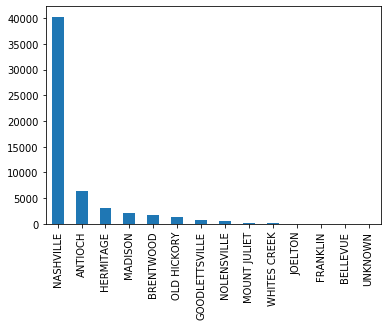

In [26]:
housing_data_pd['Property City'].value_counts().plot(kind='bar')

In [27]:
# housing_data_pd.unique()
group1 = select.groupby(['Sale Date', 'Building Value']).agg({'Total Value':'mean'})
group1.head()

# mean_housing_data = housing_data_pd.groupby(['Sale Date', 'Year Built']).mean()
# mean_housing_data.head()


Total Value
Sale Date  Building Value             
2013-01-02 48200.0             93200.0
           83400.0            245200.0
           114700.0           139100.0
           368200.0           459800.0
           1184700.0         1465500.0

In [215]:
# import http.client 

# conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

from pandas.io.json import json_normalize 


headers = { 
    'accept': "application/json", 
    'apikey': "404ae93cc9219140b06ca081c0faa537", 
} 

# conn.request("GET", "/propertyapi/v1.0.0/property/detail?address1=4529%20Winona%20Court&address2=Denver%2C%20CO", headers=headers) 

# res = conn.getresponse() 
# data = res.read() 

# res_data = data.decode("utf-8")


#response = requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?latitude=30.2500&longitude=-97.7500&radius=2&orderBy=saleAmt+desc")
downtown = requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/salestrend/snapshot?geoid=ZI37201&interval=monthly&startyear=2014&endyear=2018&startmonth=january&endmonth=december&apikey=404ae93cc9219140b06ca081c0faa537", headers=headers)
# res_data
attom= downtown.json()
downtown_trends = attom['salestrends']

# # for each in sales_trends:
# #     print(each)
pprint(downtown_trends[0])
# for datapoint in downtown_trends:
#     print(datapoint)
# for datapoint in downtown_trends:
#     for dataval in datapoint:
#         print(dataval)
time = []
for datapoint in downtown_trends:
    for datakey, dataval in datapoint.items():
        if datakey == 'daterange':
            for timestamp, timestampval in dataval.items():
                if timestamp == 'end':
                    time.append(timestampval)
print(time)
#                 if timestamp == 'start':
#                     print(timestampval)
                    


{'SalesTrend': {'avgsaleprice': 251438.0,
                'homesalecount': 8,
                'medsaleprice': 279500.0},
 'daterange': {'end': 'January 2014',
               'interval': 'monthly',
               'start': 'January 2014'},
 'location': {'geoID': 'ZI37201'},
 'vintage': {'pubDate': '2019-8-8'}}
['January 2014', 'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014', 'July 2014', 'August 2014', 'September 2014', 'October 2014', 'November 2014', 'December 2014', 'January 2015', 'February 2015', 'March 2015', 'April 2015', 'May 2015', 'June 2015', 'July 2015', 'August 2015', 'September 2015', 'October 2015', 'November 2015', 'December 2015', 'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016', 'August 2016', 'September 2016', 'October 2016', 'November 2016', 'December 2016', 'January 2017', 'February 2017', 'March 2017', 'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017', 'September 2017', 'October 20

In [204]:
downtown_trends

[{'location': {'geoID': 'ZI37201'},
  'daterange': {'start': 'January 2014',
   'end': 'January 2014',
   'interval': 'monthly'},
  'SalesTrend': {'homesalecount': 8,
   'avgsaleprice': 251438.0,
   'medsaleprice': 279500.0},
  'vintage': {'pubDate': '2019-8-8'}},
 {'location': {'geoID': 'ZI37201'},
  'daterange': {'start': 'February 2014',
   'end': 'February 2014',
   'interval': 'monthly'},
  'SalesTrend': {'homesalecount': 3,
   'avgsaleprice': 237833.0,
   'medsaleprice': 233000.0},
  'vintage': {'pubDate': '2019-8-8'}},
 {'location': {'geoID': 'ZI37201'},
  'daterange': {'start': 'March 2014',
   'end': 'March 2014',
   'interval': 'monthly'},
  'SalesTrend': {'homesalecount': 10,
   'avgsaleprice': 252650.0,
   'medsaleprice': 246250.0},
  'vintage': {'pubDate': '2019-8-8'}},
 {'location': {'geoID': 'ZI37201'},
  'daterange': {'start': 'April 2014',
   'end': 'April 2014',
   'interval': 'monthly'},
  'SalesTrend': {'homesalecount': 7,
   'avgsaleprice': 316986.0,
   'medsalepri

In [218]:
avgsaleprice = []
for datapoint in downtown_trends:
    for datakey, dataval in datapoint.items():
        if datakey == 'SalesTrend':
            for sale, saleval in dataval.items():
                if sale == 'avgsaleprice':
                    avgsaleprice.append(saleval)
print(avgsaleprice)

# my_dict={"time":time, 
#         "avgsaleprice": avgsaleprice}
df= pd.DataFrame()
df.append({"time":time, "avgsale":avgsaleprice})

[251438.0, 237833.0, 252650.0, 316986.0, 365286.0, 261305.0, 212150.0, 370286.0, 373571.0, 307433.0, 329000.0, 273250.0, 270000.0, 242114.0, 296414.0, 276208.0, 302163.0, 293514.0, 287714.0, 321218.0, 216500.0, 267550.0, 519000.0, 261233.0, 334975.0, 241430.0, 466214.0, 272750.0, 361600.0, 1200278.0, 257250.0, 297390.0, 296842.0, 275967.0, 324150.0, 340400.0, 428000.0, 617378.0, 286880.0, 296317.0, 381075.0, 387545.0, 341422.0, 412613.0, 330000.0, 749975.0, 284617.0, 341650.0, 618333.0, 340538.0, 669091.0, 383227.0, 303333.0, 412857.0, 321250.0, 431556.0, 372625.0, 475667.0, 398583.0, 374743.0]


TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [150]:
# List of channels we want to access
location= []
avgsaleprice=[]
homesalecount=[]
medsaleprice=[]
daterange=[]
#humidity.append(response["main"]["humidity"])

channels = ["location", "vintage", "SalesTrend", "daterange"]

channels_list = []
# For each channel, we access its information through its API
for channel in channels:
    JSONContent =  requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/salestrend/snapshot?geoid=ZI37201&interval=monthly&startyear=2014&endyear=2018&startmonth=january&endmonth=december&apikey=404ae93cc9219140b06ca081c0faa537", headers=headers)
    location.append(response["location"])
    avgsaleprice.append(response["avgsaleprice"])
        
        
        
#         ([response(JSONContent['location']), response(JSONContent['vintage']), response(JSONContent['SalesTrend']),
#                              response(JSONContent['daterange'])])
                         
dataset = pd.DataFrame(channels_list)
dataset.sample(5)

TypeError: 'Response' object is not subscriptable

In [168]:
sales_trends_df = pd.DataFrame({'sales_trends':[],
                                'SalesTrend':[],
                                'daterange': [],
                                'vintage': []})
sales_trends_df.head()



,sales_trends,SalesTrend,daterange,vintage


In [158]:
gulch = requests.get("https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?latitude=36.153&longitude=-86.789&radius=2&orderBy=saleAmt+desc&apikey=404ae93cc9219140b06ca081c0faa537", headers=headers)
gulch = gulch.json()
gulch
# https://api.gateway.attomdata.com/poisearch/v2.0.0/poi/geography?PostalCodeKey=37201&SearchDistance=5&RecordLimit=20
# <item type="ST" id="ST47" name="Tennessee" abbreviation="TN" geo_key="ST47" geo_center_latitude="35.8585560000" geo_center_longitude="-86.3493580000" />

{'status': {'version': '1.0.0',
  'code': 0,
  'msg': 'SuccessWithResult',
  'total': 10000,
  'page': 1,
  'pagesize': 10},
 'property': [{'identifier': {'obPropId': 4448831447037,
    'fips': '47037',
    'apn': '10406016200',
    'apnOrig': '10406016200',
    'attomId': 44488314},
   'lot': {'lotSize1': 1.05},
   'address': {'country': 'US',
    'countrySubd': 'TN',
    'line1': '3319 W END AVE',
    'line2': 'NASHVILLE, TN 37203',
    'locality': 'Nashville',
    'matchCode': 'ExaStr',
    'oneLine': '3319 W END AVE, NASHVILLE, TN 37203',
    'postal1': '37203',
    'postal2': '1059',
    'postal3': 'C024'},
   'location': {'accuracy': 'Street',
    'elevation': 0.0,
    'latitude': '36.139949',
    'longitude': '-86.818246',
    'distance': 1.87,
    'geoid': 'CO47037, CS4793268, DB4703180, MT30002712, ND0000628793, ND0004692588, PL4752006, SB0000117258, SB0000117275, SB0000117312, ZI37203'},
   'summary': {'propclass': 'Office Building',
    'propsubtype': 'COMMERCIAL',
    'prop

In [132]:
attom_dic = {
    "Avg Sale Price": avgsaleprice,
    "Median Sale Price": medsaleprice,
    "geoID": geoID,
    "Date": date,
#     "Humidity": humidity,
#     "Latitude": lat,
#     "Longitude": lng,
#     "Max Temp": max_temp,
#     "Wind Speed": wind_speed
}



NameError: name 'avgsaleprice' is not defined

In [133]:
pprint(res_data)

('{"status":{"version":"1.0.0","code":0,"msg":"SuccessWithResult","total":1,"page":1,"pagesize":10},"property":[{"identifier":{"obPropId":18471319108031,"fips":"08031","apn":"0219204018000","apnOrig":"219204018000","attomId":184713191},"lot":{"depth":0,"frontage":0,"lotnum":"31","lotsize1":0.1077,"lotsize2":4690,"pooltype":"NONE"},"area":{"blockNum":"36","countrysecsubd":"Denver '
 'County","countyuse1":"113","muncode":"DE","munname":"DENVER","srvyRange":"68W","srvySection":"19","srvyTownship":"03S","subdname":"BERKELEY","subdtractnum":"0","taxcodearea":"0"},"address":{"country":"US","countrySubd":"CO","line1":"4529 '
 'WINONA CT","line2":"DENVER, CO '
 '80212","locality":"Denver","matchCode":"ExaStr","oneLine":"4529 WINONA CT, '
 'DENVER, CO '
 '80212","postal1":"80212","postal2":"2512","postal3":"C037"},"location":{"accuracy":"Street","elevation":0.0,"latitude":"39.778904","longitude":"-105.047624","distance":0.0,"geoid":"CO08031, '
 'CS0891007, DB0803360, MT30001324, ND0000119198, N

In [30]:
df_format= group1.pivot_table(index='Sale Date', columns='Building Value', values ='Total Value')
# Preview that Reformatting worked
df_format.head()

Building Value,0.0,1400.0,1600.0,2100.0,2300.0,2700.0,2900.0,3300.0,3400.0,3500.0,...,2472500.0,2490600.0,2493900.0,2673700.0,2691500.0,3456900.0,3563100.0,3768000.0,5824300.0,12971800.0
Sale Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,15300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_format = group1.plot
df_format

In [219]:
chicago_zip = [60007, 60018, 60068, 60106, 60131, 60176, 60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609, 60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618, 60619, 60620, 60621, 60622, 60623, 60624, 60625, 60626, 60628, 60629, 60630, 60631, 60632, 60633, 60634, 60636, 60637, 60638, 60639, 60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647, 60649, 60651, 60652, 60653, 60654, 60655, 60656, 60657, 60659, 60660, 60661, 60706, 60707, 60714, 60804, 60827]
chicago_zip

[60007,
 60018,
 60068,
 60106,
 60131,
 60176,
 60601,
 60602,
 60603,
 60604,
 60605,
 60606,
 60607,
 60608,
 60609,
 60610,
 60611,
 60612,
 60613,
 60614,
 60615,
 60616,
 60617,
 60618,
 60619,
 60620,
 60621,
 60622,
 60623,
 60624,
 60625,
 60626,
 60628,
 60629,
 60630,
 60631,
 60632,
 60633,
 60634,
 60636,
 60637,
 60638,
 60639,
 60640,
 60641,
 60642,
 60643,
 60644,
 60645,
 60646,
 60647,
 60649,
 60651,
 60652,
 60653,
 60654,
 60655,
 60656,
 60657,
 60659,
 60660,
 60661,
 60706,
 60707,
 60714,
 60804,
 60827]